# Assignment 6
You have to replicate all the maps in this JN using folium.

In [152]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))


In [110]:
!pip install folium
!pip install chardet
!pip install geopandas
!pip install branca

In [153]:
import matplotlib.pyplot as plt 

import numpy as np
import pandas as pd
import geopandas as gpd
import folium as fm

In [154]:
# Get data of labor
sex_work = pd.read_stata( r'C:\Users\jkss_\Documents\GitHub\MediaLab_Summer_Python\_data\8_trab_sex_20.dta' )
sex_work[ 'dpt_code' ] = sex_work.cod_ubigeo.str[ :2 ].copy()
sex_work[ 'prov_code' ] = sex_work.cod_ubigeo.str[ :4 ].copy()

# Sex work
women_work = sex_work[ sex_work.sex == 'Mujer' ].copy().reset_index( drop = True )

In [198]:
#
sex_work

,cod_ubigeo,district,month,sex,empl,dpt_code,prov_code
0,010101,CHACHAPOYAS,January,S.I.,171,01,0101
1,010101,CHACHAPOYAS,January,Hombre,1959,01,0101
2,010101,CHACHAPOYAS,January,Mujer,805,01,0101
3,010101,CHACHAPOYAS,February,S.I.,158,01,0101
4,010101,CHACHAPOYAS,February,Hombre,1798,01,0101
...,...,...,...,...,...,...,...
53419,250401,PURUS,November,Hombre,2,25,2504
53420,250401,PURUS,November,Mujer,3,25,2504
53421,250401,PURUS,December,S.I.,0,25,2504
53422,250401,PURUS,December,Hombre,2,25,2504


In [156]:
# get data from lima
women_work[ 'month' ] = pd.to_datetime( women_work.month , format = '%B' ) \
                                    .dt.strftime( '%m' ) \
                                    .astype( int )

In [200]:
#
women_work

,cod_ubigeo,district,month,sex,empl,dpt_code,prov_code
0,010101,CHACHAPOYAS,1,Mujer,805,01,0101
1,010101,CHACHAPOYAS,2,Mujer,812,01,0101
2,010101,CHACHAPOYAS,3,Mujer,804,01,0101
3,010101,CHACHAPOYAS,4,Mujer,678,01,0101
4,010101,CHACHAPOYAS,5,Mujer,589,01,0101
...,...,...,...,...,...,...,...
17803,250401,PURUS,8,Mujer,3,25,2504
17804,250401,PURUS,9,Mujer,3,25,2504
17805,250401,PURUS,10,Mujer,3,25,2504
17806,250401,PURUS,11,Mujer,3,25,2504


In [201]:
# Sort by department and month
women_work.sort_values([ 'cod_ubigeo', 'month'], inplace = True )

# Get the total number of women workers by dpt
dpt_women_work = women_work.groupby( [ 'cod_ubigeo', 'month'], as_index = False )[['empl']] \
                            .sum() \
                            .rename( columns = {'empl' :'women_empl'})

# Sort by dpt code and month
dpt_women_work.sort_values([ 'cod_ubigeo', 'month'], inplace = True )

In [202]:
#sorted and renamed
dpt_women_work

,cod_ubigeo,month,women_empl
0,010101,1,805
1,010101,2,812
2,010101,3,804
3,010101,4,678
4,010101,5,589
...,...,...,...
17803,250401,8,3
17804,250401,9,3
17805,250401,10,3
17806,250401,11,3


In [204]:
df2 = dpt_women_work.groupby( ['cod_ubigeo'],as_index = False )[['women_empl']].mean()

In [205]:
#sorted and renamed
df2

,cod_ubigeo,women_empl
0,010101,749.750000
1,010103,1.000000
2,010107,0.166667
3,010109,2.166667
4,010110,6.166667
...,...,...
1479,250302,32.750000
1480,250303,3.166667
1481,250304,22.666667
1482,250305,13.000000


## Shapefile

In [162]:
dpt_shp = gpd.read_file( r'C:\Users\jkss_\Documents\GitHub\MediaLab_Summer_Python\_data\INEI_LIMITE_DEPARTAMENTAL\INEI_LIMITE_DEPARTAMENTAL.shp' )

In [163]:
df3 = dpt_shp.merge( df2, left_on = 'CCDD', right_on = 'dpt_code'  )

In [164]:
df3.dtypes


OBJECTID_1       int64
OBJECTID       float64
CCDD            object
NOMBDEP         object
CAPITAL         object
Shape_STAr     float64
Shape_STLe     float64
ORIG_FID         int64
Shape_Leng     float64
Shape_Area     float64
CORREO          object
CONTACTO        object
WHATSAPP        object
geometry      geometry
dpt_code        object
women_empl     float64
dtype: object

<Axes: >

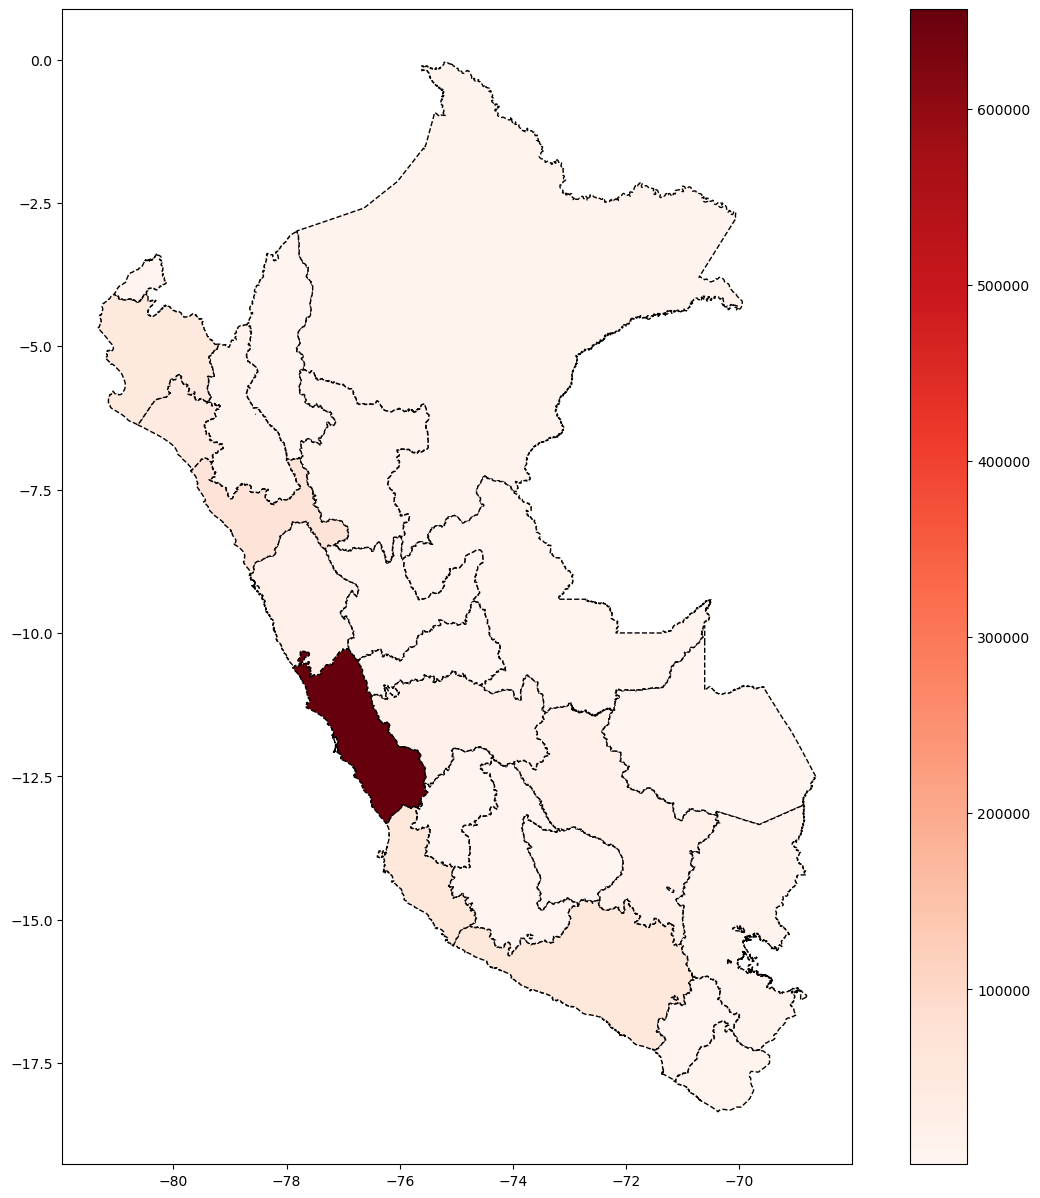

In [165]:
df3.plot( column='women_empl', cmap='Reds', figsize=(15, 15), linestyle='--',
                      edgecolor='black', 
                      legend = True)

## Replica 1

In [166]:
#geo_data (geometry_polygons)

distritos = gpd.read_file(r'C:\Users\jkss_\Documents\GitHub\MediaLab_Summer_Python\_data\Folium\peru_distrital_simple.geojson')
distritos

,OBJECTID,IDDIST,IDDPTO,IDPROV,NOMBDIST,NOMBPROV,NOMBDEP,DCTO,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,geometry
0,1,230110,23,2301,CORONEL GREGORIO ALBARRACIN LANCHIPA,TACNA,TACNA,LEY,27415,02/02/2001,ALFONSO UGARTE,0.570510,0.016140,0.570195,0.015990,18834.14,"POLYGON ((-70.14409 -18.09309, -70.17512 -18.1..."
1,2,230108,23,2301,POCOLLAY,TACNA,TACNA,LEY,13069,15/01/1959,POCOLLAY,0.883871,0.022816,0.897169,0.022961,27073.52,"POLYGON ((-69.90467 -17.95829, -69.98287 -18.0..."
2,3,230103,23,2301,CALANA,TACNA,TACNA,LEY,S/N,20/08/1872,CALANA,0.446736,0.009458,0.445963,0.009383,11063.99,"POLYGON ((-70.09201 -17.98026, -70.17243 -18.0..."
3,4,230101,23,2301,TACNA,TACNA,TACNA,-,-,EPOCA INDEP.,TACNA,2.758951,0.209156,2.758123,0.209177,246365.27,"POLYGON ((-70.23500 -17.99231, -70.23710 -18.0..."
4,5,230109,23,2301,SAMA,TACNA,TACNA,-,-,EPOCA INDEP.,LAS YARAS,1.515506,0.096789,1.513660,0.096766,113953.51,"POLYGON ((-70.42374 -17.88983, -70.51323 -17.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1830,160303,16,1603,TIGRE,LORETO,LORETO,LEY,9815,02/07/1943,INTUTU,9.211057,1.637168,9.179725,1.637432,2011378.30,"POLYGON ((-74.96515 -2.36565, -74.94959 -2.458..."
1830,1831,160107,16,1601,NAPO,MAYNAS,LORETO,LEY,9815,02/07/1943,SANTA CLOTILDE,11.380550,1.986357,11.359436,1.985362,2440805.01,"POLYGON ((-72.93790 -2.83906, -72.97311 -2.930..."
1831,1832,160109,16,1601,PUTUMAYO,MAYNAS,LORETO,LEY,9815,02/07/1943,SAN ANTONIO DEL ESTRECHO,16.256407,2.884865,16.232424,2.884722,3555516.31,"POLYGON ((-73.53075 -1.45793, -73.47857 -1.522..."
1832,1833,160110,16,1601,TORRES CAUSANA,MAYNAS,LORETO,LEY,9815,02/07/1943,PANTOJA,6.592491,0.609698,6.572157,0.609290,749185.08,"POLYGON ((-74.87370 -0.95012, -74.88779 -1.006..."


In [167]:
#cleaning geo_data
distritos1 = distritos[['IDDIST', 'geometry']]
distritos1 = distritos1 .rename({'IDDIST':'UBIGEO1'}, axis =1 )
distritos1['UBIGEO1'] = distritos1['UBIGEO1'].astype(str).astype(np.int64)
distritos1

,UBIGEO1,geometry
0,230110,"POLYGON ((-70.14409 -18.09309, -70.17512 -18.1..."
1,230108,"POLYGON ((-69.90467 -17.95829, -69.98287 -18.0..."
2,230103,"POLYGON ((-70.09201 -17.98026, -70.17243 -18.0..."
3,230101,"POLYGON ((-70.23500 -17.99231, -70.23710 -18.0..."
4,230109,"POLYGON ((-70.42374 -17.88983, -70.51323 -17.9..."
...,...,...
1829,160303,"POLYGON ((-74.96515 -2.36565, -74.94959 -2.458..."
1830,160107,"POLYGON ((-72.93790 -2.83906, -72.97311 -2.930..."
1831,160109,"POLYGON ((-73.53075 -1.45793, -73.47857 -1.522..."
1832,160110,"POLYGON ((-74.87370 -0.95012, -74.88779 -1.006..."


In [169]:
distritos1.shape

(1834, 2)

In [195]:
women_work

,cod_ubigeo,district,month,sex,empl,dpt_code,prov_code
0,010101,CHACHAPOYAS,1,Mujer,805,01,0101
1,010101,CHACHAPOYAS,2,Mujer,812,01,0101
2,010101,CHACHAPOYAS,3,Mujer,804,01,0101
3,010101,CHACHAPOYAS,4,Mujer,678,01,0101
4,010101,CHACHAPOYAS,5,Mujer,589,01,0101
...,...,...,...,...,...,...,...
17803,250401,PURUS,8,Mujer,3,25,2504
17804,250401,PURUS,9,Mujer,3,25,2504
17805,250401,PURUS,10,Mujer,3,25,2504
17806,250401,PURUS,11,Mujer,3,25,2504


In [196]:
# Sort by UBIGEO and month
women_work.sort_values([ 'cod_ubigeo', 'month'], inplace = True )

# Get the total number of women workers by dpt
dpt_women_work = women_work.groupby( [ 'cod_ubigeo', 'month'], as_index = False )[['empl']] \
                            .sum() \
                            .rename( columns = {'empl' :'women_empl'})

# Sort by dpt code and month
dpt_women_work.sort_values([ 'cod_ubigeo', 'month'], inplace = True )

In [191]:

dpt_women_work = dpt_women_work .rename({'cod_ubigeo':'UBIGEO1'}, axis =1 )
dpt_women_work['UBIGEO1'] = dpt_women_work['UBIGEO1'].astype(str).astype(np.int64)
dpt_women_work

,UBIGEO1,month,women_empl
0,10101,1,805
1,10101,2,812
2,10101,3,804
3,10101,4,678
4,10101,5,589
...,...,...,...
17803,250401,8,3
17804,250401,9,3
17805,250401,10,3
17806,250401,11,3


In [192]:
#df_replica
df_replica = dpt_women_work.groupby( ['UBIGEO1'],as_index = False )[['women_empl']].mean()

In [182]:
dpt_women_work.shape

(17808, 3)

In [188]:
column_names = dpt_women_work.columns
print(column_names)

Index(['UBIGEO1', 'month', 'women_empl'], dtype='object')


In [207]:
df2 = df2 .rename({'cod_ubigeo':'UBIGEO1'}, axis =1 )
df2['UBIGEO1'] = df2['UBIGEO1'].astype(str).astype(np.int64)
df2

,UBIGEO1,women_empl
0,10101,749.750000
1,10103,1.000000
2,10107,0.166667
3,10109,2.166667
4,10110,6.166667
...,...,...
1479,250302,32.750000
1480,250303,3.166667
1481,250304,22.666667
1482,250305,13.000000


In [208]:
# government palace coordinates

lat_palacio = -12.0757538
long_palacio = -76.9863174
zoom_start = 5

replica_1 = fm.Map(location = [lat_palacio, long_palacio], tiles='cartodbpositron', zoom_start = zoom_start)

# Mandatory: geo_data in GeoJson format
# columns: variables from economics indicators data set
# Atention !!! key_on: commom variable between geodata and data "feature.properties.(name of variable)"

fm.Choropleth(
    geo_data=distritos1,
    data=df2,
    columns=['UBIGEO1', 'women_empl'],
    key_on="feature.properties.UBIGEO1",
    fill_color="YlOrRd",
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name="Women_empl (%)",
    smooth_factor=0,
    Highlight= True,
    line_color = "#0000",
    overlay=True,
    nan_fill_color = "White"  # fill white missing values 
    ).add_to(replica_1)

#fm.LayerControl().add_to(z)

# Save in a html format 

#z.save("Poverty_Map.html")

replica_1

<AxesSubplot:>

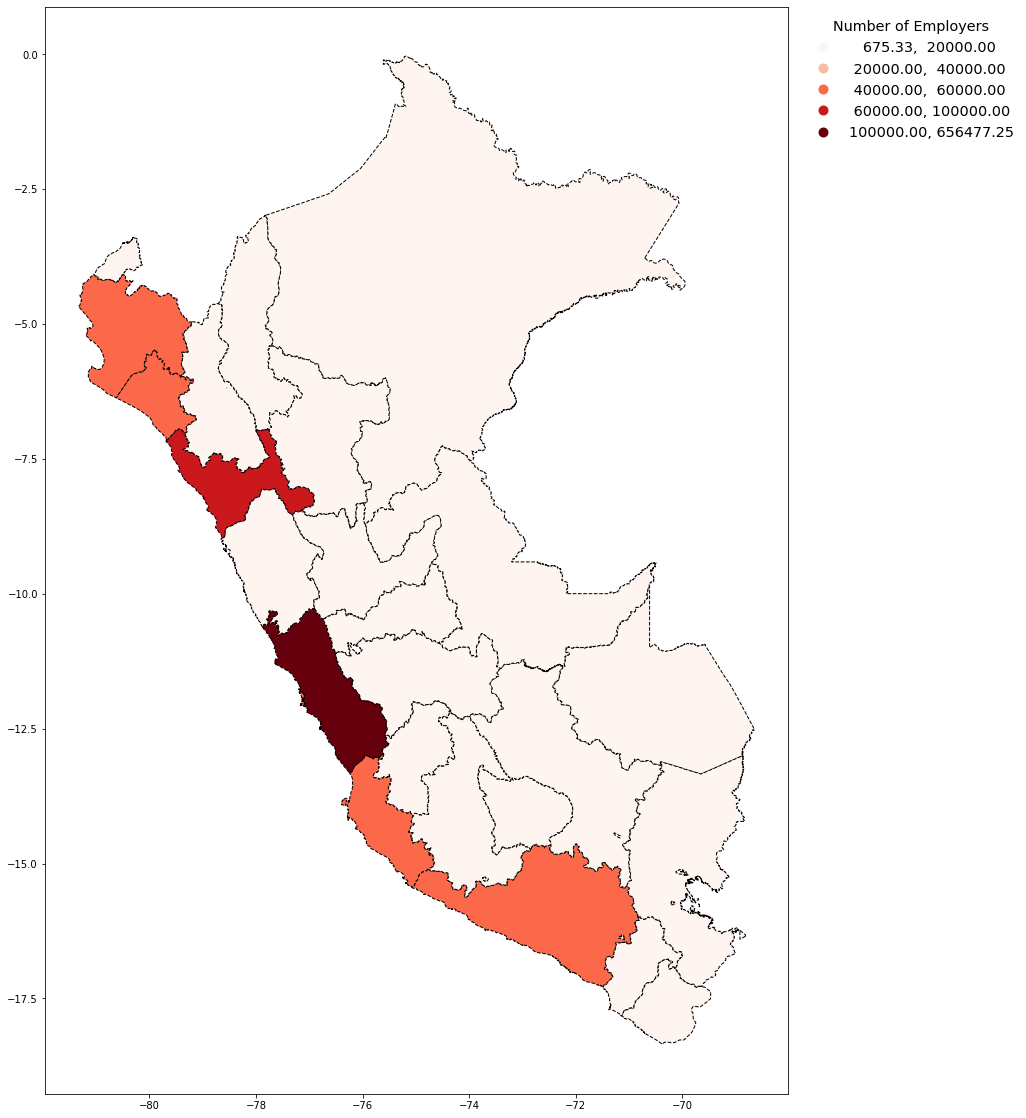

In [10]:
fig, ax = plt.subplots(figsize=(20, 20))
df3.plot( ax = ax, 
        column='women_empl', 
         cmap= 'Reds', 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         classification_kwds = dict( bins = [ 20000, 40000, 60000, 100000  ] ), 
         legend_kwds = dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of Employers", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )


<AxesSubplot:>

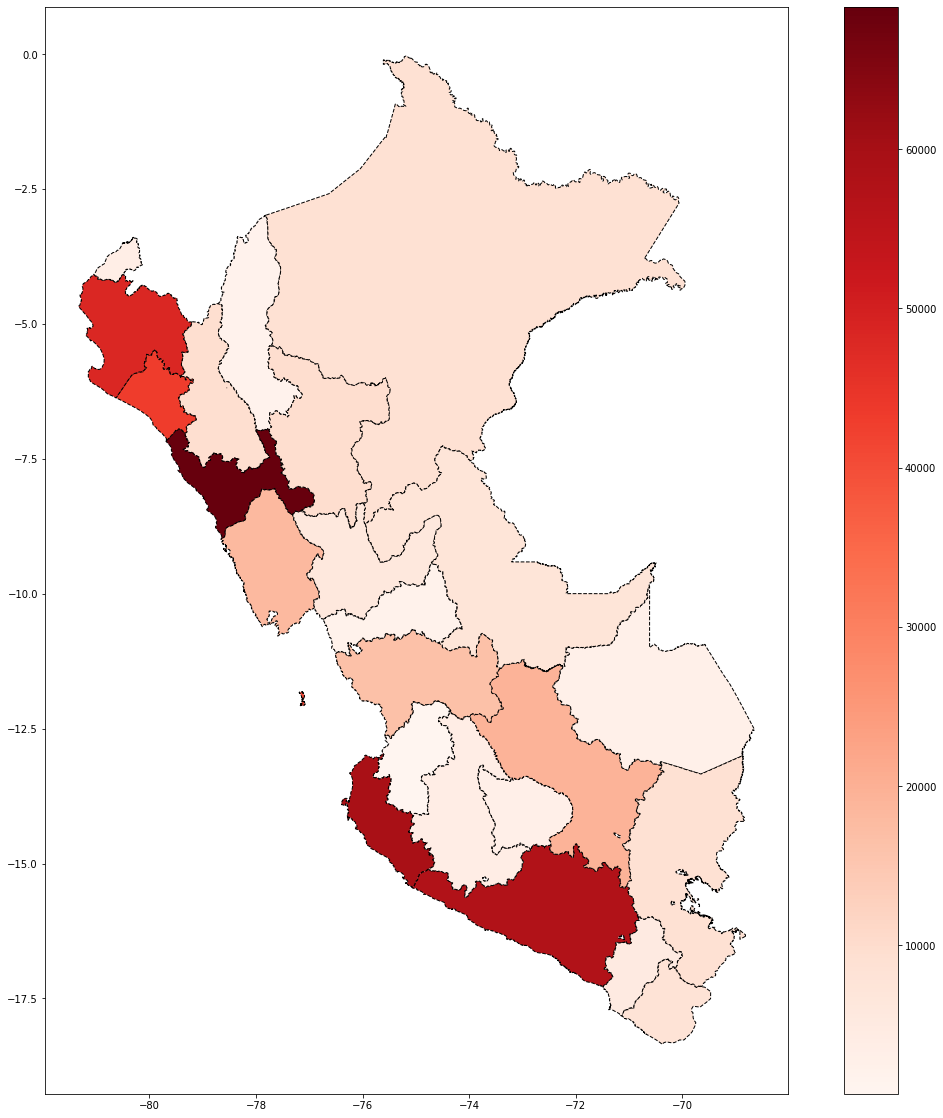

In [69]:
df3[ df3.CCDD != "15" ].plot( column='women_empl', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)

In [70]:
df4 = sex_work.groupby( ['dpt_code', 'month', 'sex'], as_index = False )[['empl']].sum() \
        .pivot( index = [ 'dpt_code', 'month' ] , columns = 'sex',values='empl') \
        .reset_index()

In [71]:
df4

sex,dpt_code,month,S.I.,Hombre,Mujer
0,01,January,472,5108,2043
1,01,February,441,4951,2059
2,01,March,423,4459,2056
3,01,April,314,3211,1811
4,01,May,297,3049,1642
...,...,...,...,...,...
295,25,August,1654,16885,7425
296,25,September,1689,17886,7549
297,25,October,1812,19223,7751
298,25,November,1882,19758,7933


In [72]:
df4[ 'prop_wom' ] = ( df4.Mujer * 100 / df4.Hombre )

In [73]:
df5 = dpt_shp.merge( df4, left_on = 'CCDD', right_on = 'dpt_code'  )

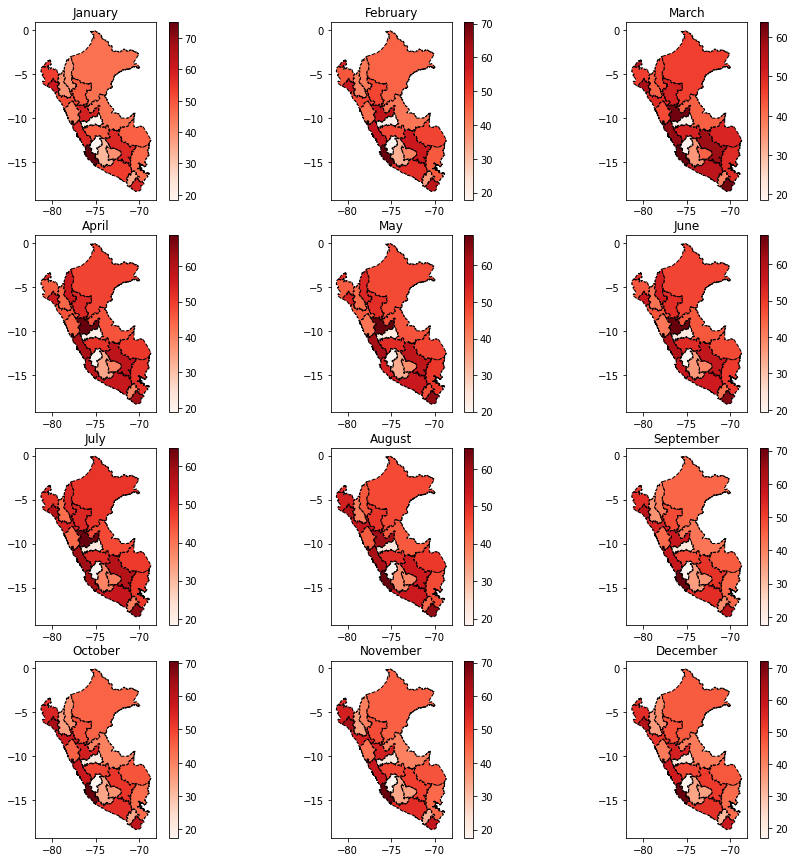

In [15]:
fig, axis = plt.subplots( nrows = 4, ncols= 3, figsize = ( 15, 15 ) )

idx = 0
for i in range( 4 ):
    for j in range ( 3 ):
        
        
        ax = axis[ i ][ j ]
        
        month = df5.month.unique()[ idx ]
        
        df6 = df5[ df5.month == month ]
        
        df6.plot( column='prop_wom', 
                  cmap='Reds', 
                  linestyle='--',
                  edgecolor='black', 
                  legend = True, 
                  ax = ax 
                )
        
        ax.set_title( month )
        
        idx = idx + 1

In [74]:
from textwrap import wrap

In [75]:
# Inverting colour map
cmap = plt.cm.OrRd

<AxesSubplot:>

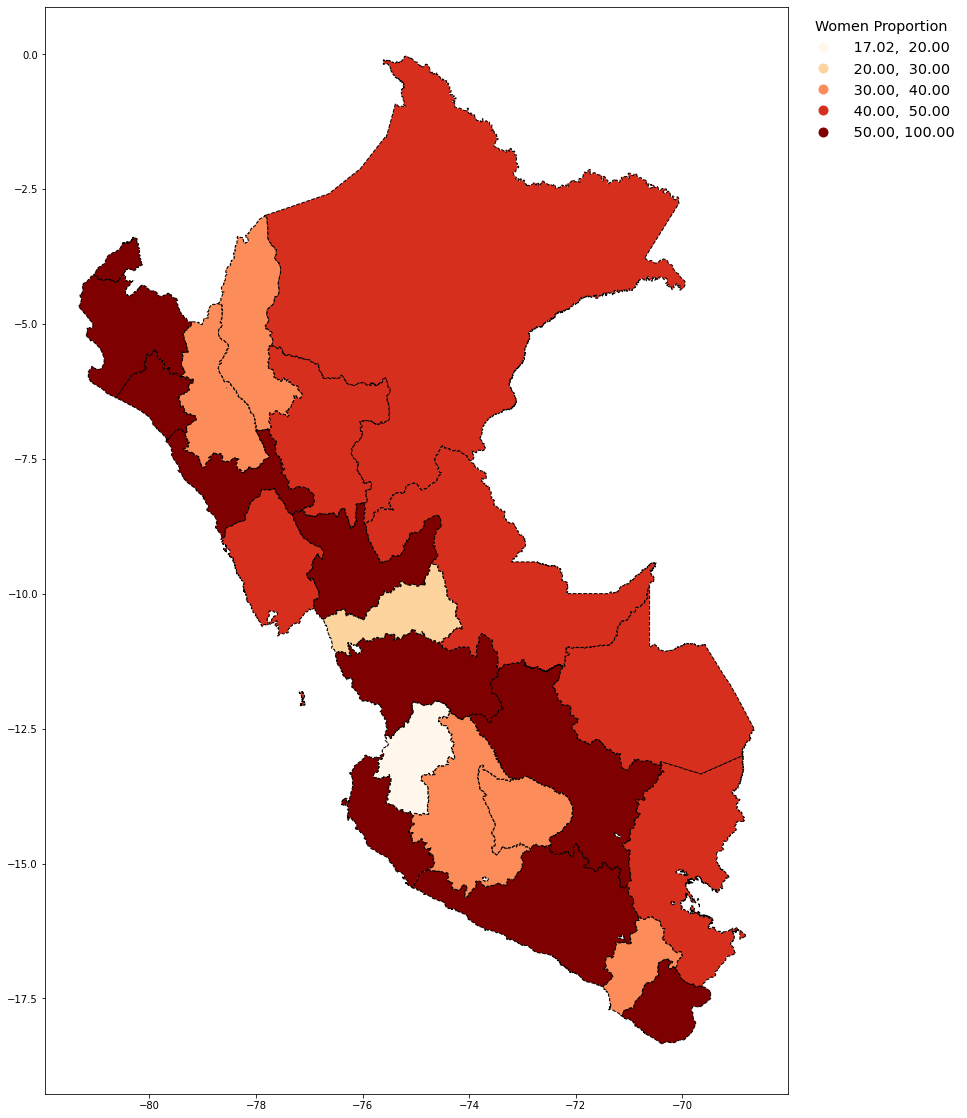

In [76]:
fig, ax = plt.subplots(figsize=(20, 20))
df6.plot( ax = ax, 
        column='prop_wom', 
         cmap= cmap, 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         classification_kwds = dict( bins = [ 20, 30, 40, 50,  100 ] ), 
         legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Women Proportion", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )


In [77]:
df6.loc[ (df6.NOMBDEP == 'LIMA'), 'prop_wom' ] = np.nan

<AxesSubplot:>

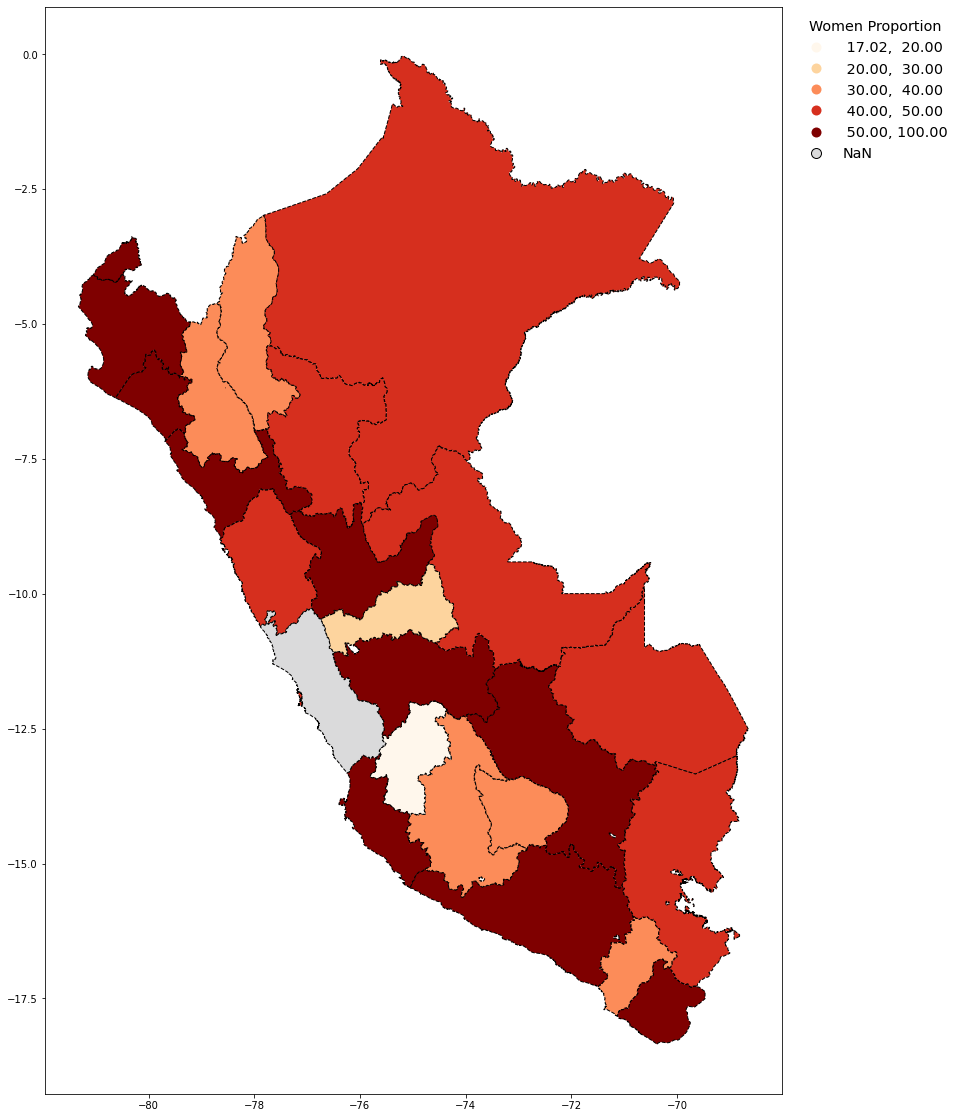

In [20]:
fig, ax = plt.subplots(figsize=(20, 20))
df6.plot( ax = ax, 
        column='prop_wom', 
         cmap= cmap, 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         missing_kwds= dict(color = "#DADADB",), 
         classification_kwds = dict( bins = [ 20, 30, 40, 50,  100 ] ), 
         legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Women Proportion", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )

<AxesSubplot:>

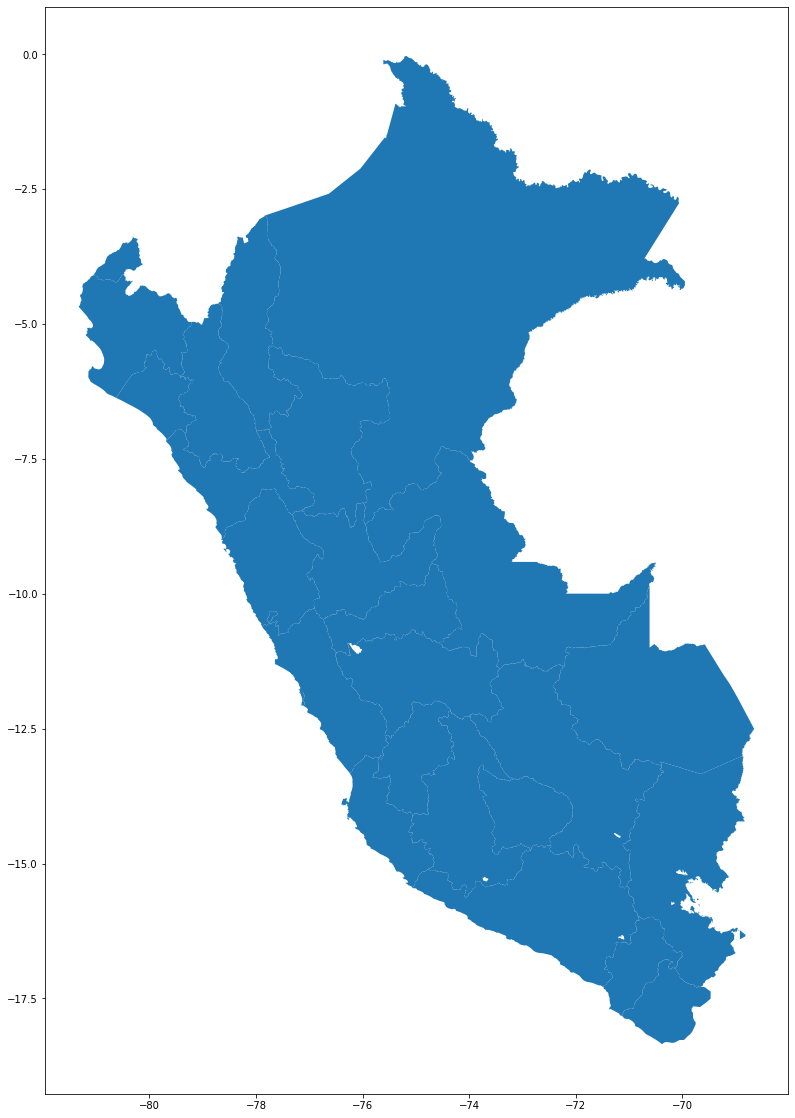

In [21]:
fig, ax = plt.subplots(figsize=(20, 20))
dpt_shp.plot( ax = ax )

In [22]:
dpt_shp['country'] = 'PERU'

In [23]:
ctr_shp = dpt_shp.dissolve( by = 'country')

<AxesSubplot:>

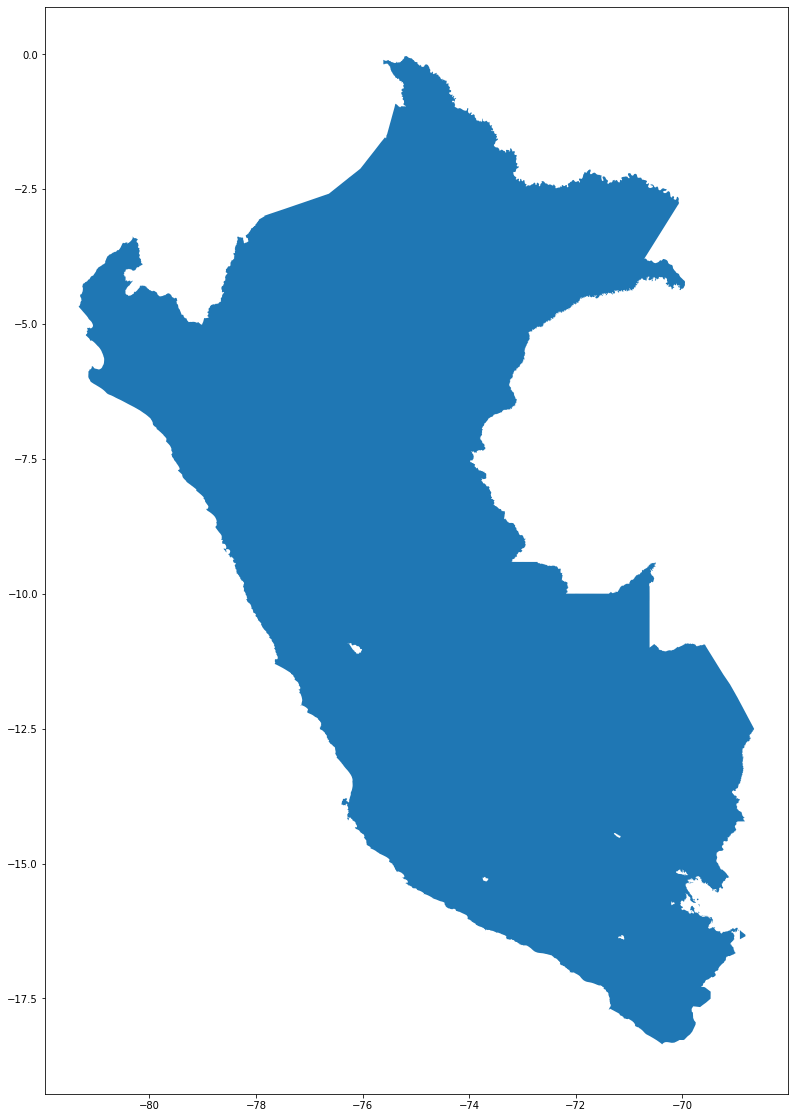

In [24]:
fig, ax = plt.subplots(figsize=(20, 20))
ctr_shp.plot( ax = ax )